In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Directamente cargo los archivos para no tener que correr todo el código anterior.
data=pd.read_csv("csv/data.csv")
df_belongs_to_collection=pd.read_csv("csv/collection.csv")
df_production_countries=pd.read_csv("csv/countries.csv")
df_production_companies=pd.read_csv("csv/companies.csv")
df_crew=pd.read_csv("csv/crew.csv")
df_genres=pd.read_csv("csv/genres.csv")
df_cast=pd.read_csv("csv/cast.csv")

# Preparar los df
Hay que ponerlos de forma que se puedan juntar todos a uno (unirlos por id_pelicula, y que cada columna importante tenga su id -cambiar el nombre a aquellos que ya tengan id, para que no se repita el mismo nombre de -) y de ahi decidir las columnas que considero innecesarias para sacarlas.
Más adelante se va a usar los df sin unir para conseguir la información necesaria desde el df que junta 

### data

In [5]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_date,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995-10-30,1995,30000000.0,373554033.0,12.451801


Considero innecesaria la fecha completa de estreno, voy a dejar solo el año.

In [6]:
data.drop(columns='release_date',inplace=True)

In [7]:
data.head(1)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_year,budget,revenue,return
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995,30000000.0,373554033.0,12.451801


In [8]:
type(data['release_year'][0])

numpy.int64

Pasar "status" a numerico

In [9]:
a=pd.factorize(data['status'])[0]
data['status_num']=a

In [10]:
len(data['id_pelicula'].unique())

45346

In [11]:
data[data['status_num']!=0]

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_year,budget,revenue,return,status_num
189,56088,The Show,A documentary about the culture of hip-hop. Th...,NaN,93.0,0.159596,What Happens On Stage Is Only Half The Story!,en,5.3,2.0,1995,0.0,0.0,0.0,-1
682,48260,Butterfly Kiss,Eunice is walking along the highways of northe...,Rumored,88.0,0.877853,NaN,en,7.4,5.0,1995,0.0,0.0,0.0,1
765,52059,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,NaN,180.0,0.107050,NaN,en,6.7,3.0,1995,0.0,0.0,0.0,-1
773,44495,A Very Natural Thing,"When David, an ex-monk still in his twenties m...",Rumored,80.0,0.147662,NaN,en,6.3,3.0,1974,0.0,0.0,0.0,1
1030,38191,The Sunchaser,A young half-Navajo convict (Jon Seda) dying o...,Rumored,122.0,2.358090,It began as a kidnapping. It became a journey ...,en,6.1,8.0,1996,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45011,63568,But What If This Is Love?,High school students Ksenya and Boris are in l...,Rumored,102.0,0.104567,NaN,ru,5.0,1.0,1961,0.0,0.0,0.0,1
45060,41811,Eating,"At a spacious house in Los Angeles, Helene is ...",NaN,110.0,0.000002,NaN,en,0.0,0.0,1990,0.0,0.0,0.0,-1
45107,414453,Columbus,A Korean-born man finds himself stuck in Colum...,Post Production,104.0,1.309265,NaN,en,6.0,4.0,2017,0.0,0.0,0.0,2
45189,87229,King's Road,After 3 years abroad Junior returns to Iceland...,Rumored,99.0,0.008498,When you are strange,is,0.0,0.0,2010,0.0,0.0,0.0,1


In [12]:
data.head(3)

,id_pelicula,title,overview,status,runtime,popularity,tagline,original_language,vote_average,vote_count,release_year,budget,revenue,return,status_num
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Released,81.0,21.946943,NaN,en,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,0
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Released,104.0,17.015539,Roll the dice and unleash the excitement!,en,6.9,2413.0,1995,65000000.0,262797249.0,4.043035,0
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Released,101.0,11.712900,Still Yelling. Still Fighting. Still Ready for...,en,6.5,92.0,1995,0.0,0.0,0.000000,0


Uno los dataframe a uno grande para realizar el analisis de relaciones entre las variables. Hay df que considere innecesarios de unir (el de paises, por ej)

Cambio los nombres de los id de cada df para diferenciarlos y que no se superpongan, al cambiarlos voy a poner "df_id" o una abreviación del nombre del df

### countries

Tiene problemas de memoria al ser tan grande, aún asi lo considero innecesario asi que no se va a mergear en el df de todo.<br>
Pero se analizó igual.

In [13]:
df_production_countries.head(1)

,iso_3166_1,name,id_pelicula
0,US,United States of America,862


Como los paises no tienen id les creo unos con el metodo 'factorize' de pandas

In [14]:
a=pd.factorize(df_production_countries['name'])[0]

In [15]:
df_production_countries['countrie_id']=a

In [16]:
df_production_countries

,iso_3166_1,name,id_pelicula,countrie_id
0,US,United States of America,862,0
1,US,United States of America,8844,0
2,US,United States of America,15602,0
3,US,United States of America,31357,0
4,US,United States of America,11862,0
...,...,...,...,...
49403,US,United States of America,30840,0
49404,PH,Philippines,111109,47
49405,US,United States of America,67758,0
49406,RU,Russia,227506,20


In [17]:
df_production_countries[df_production_countries['countrie_id']==100].head(3)

,iso_3166_1,name,id_pelicula,countrie_id
11481,MC,Monaco,28055,100
18296,MC,Monaco,36970,100
19469,MC,Monaco,41211,100


In [18]:
df_production_countries['name_countrie']=df_production_countries['name']
df_production_countries['short_name_countrie']=df_production_countries['iso_3166_1']

df_production_countries.drop(columns=['iso_3166_1','name'],inplace=True)

In [19]:
df_production_countries.shape

(49408, 4)

### companies

Es innecesario para nuestro EDA (en mi opinión) , asi que no lo voy a juntar, pero aún asi decidi analizarlo

In [20]:
df_production_companies.head(5)

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,373554033.0
1,TriStar Pictures,559.0,8844,262797249.0
2,Teitler Film,2550.0,8844,262797249.0
3,Interscope Communications,10201.0,8844,262797249.0
4,Warner Bros.,6194.0,15602,0.0


In [21]:
df_production_companies[df_production_companies['id']==3.0]

,name,id,id_pelicula,revenue
0,Pixar Animation Studios,3.0,862,3.735540e+08
4334,Pixar Animation Studios,3.0,9487,3.632589e+08
5785,Pixar Animation Studios,3.0,863,4.973669e+08
9138,Pixar Animation Studios,3.0,585,5.628163e+08
11950,Pixar Animation Studios,3.0,12,9.403355e+08
15630,Pixar Animation Studios,3.0,9806,6.314421e+08
19881,Pixar Animation Studios,3.0,13925,0.000000e+00
20574,Pixar Animation Studios,3.0,920,4.619831e+08
21808,Pixar Animation Studios,3.0,2062,6.237228e+08
24309,Pixar Animation Studios,3.0,10681,5.213119e+08


In [22]:
df_production_companies['companie_id']=df_production_companies['id']
#df_production_companies['companie_name']=df_production_companies['name']
df_production_companies.drop(columns=['id','name','revenue'],inplace=True) #Innecesario tener revenue dos veces, esta columna era copia del df "data"

In [23]:
df_production_companies[df_production_companies['companie_id']==10201]

,id_pelicula,companie_id
3,8844,10201.0
159,2054,10201.0
451,79593,10201.0
671,161495,10201.0
884,46094,10201.0
1167,9057,10201.0
1288,46029,10201.0
1407,27281,10201.0
1434,43634,10201.0
1650,11511,10201.0


In [24]:
df_production_companies.drop_duplicates()

,id_pelicula,companie_id
0,862,3.0
1,8844,559.0
2,8844,2550.0
3,8844,10201.0
4,15602,6194.0
...,...,...
70525,30840,16323.0
70526,30840,38978.0
70527,111109,19653.0
70528,67758,6165.0


### genres

In [25]:
df_genres.head(5)

,id,name,id_pelicula
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844


In [26]:
df_genres['genre_id']=df_genres['id']
#df_genres['genre_name']=df_genres['name']
df_genres.drop(columns=['id','name'],inplace=True)

In [27]:
df_genres.head(1)

,id_pelicula,genre_id
0,862,16.0


In [28]:
df_genres[df_genres['genre_id']==16]

,id_pelicula,genre_id
0,862,16.0
34,21032,16.0
124,10530,16.0
557,15789,16.0
572,43475,16.0
...,...,...
90837,460135,16.0
90867,175457,16.0
90868,184402,16.0
90958,455661,16.0


### crew

In [29]:
df_crew.head(5)

,department,gender,id,job,name,id_pelicula
0,Directing,2.0,7879.0,Director,John Lasseter,862
1,Writing,2.0,12891.0,Screenplay,Joss Whedon,862
2,Writing,2.0,7.0,Screenplay,Andrew Stanton,862
3,Writing,2.0,12892.0,Screenplay,Joel Cohen,862
4,Writing,0.0,12893.0,Screenplay,Alec Sokolow,862


In [30]:
df_crew['crew_id']=df_crew['id']
df_crew.drop(columns='id',inplace=True)

In [31]:
df_crew.head(1)

,department,gender,job,name,id_pelicula,crew_id
0,Directing,2.0,Director,John Lasseter,862,7879.0


In [32]:
#df_crew['crew_gender']=df_crew['gender']
#df_crew['crew_name']=df_crew['name']
#df_crew['crew_department']=df_crew['department']
#df_crew['crew_job']=df_crew['job']
df_crew.drop(columns=['gender','name','department','job'],inplace=True)

In [33]:
df_crew[df_crew['crew_id']==12893]

,id_pelicula,crew_id
4,862,12893.0
24648,9416,12893.0
40236,49981,12893.0
107520,11007,12893.0
119168,8920,12893.0
161082,9513,12893.0
457621,430448,12893.0


### Cast

En el caso de cast ya contaba con cast_id pero se encontraban repetidos en gran proporción y no parecen dar información importante en el df_cast, parece más un id que diferencia el cast dentro de cada pelicula solamente, haciendo que los id se repitan ya que para cada pelicula este id se reinicia, por lo tanto no nos sirve.

En su lugar vamos a utilizar los valores de la columna id que se repiten solamente por la repetición de trabajos de una misma persona, es decir, este id pertenece a una persona en particular(es único).

In [34]:
df_cast.head(4)

,cast_id,character,gender,id,name,order,id_pelicula
0,14.0,Woody (voice),2.0,31.0,Tom Hanks,0.0,862
1,15.0,Buzz Lightyear (voice),2.0,12898.0,Tim Allen,1.0,862
2,16.0,Mr. Potato Head (voice),2.0,7167.0,Don Rickles,2.0,862
3,17.0,Slinky Dog (voice),2.0,12899.0,Jim Varney,3.0,862


In [35]:
df_cast['cast_id'].value_counts()

4.0       26777
5.0       25655
3.0       25594
6.0       24006
2.0       22846
          ...  
344.0         1
1099.0        1
1098.0        1
1097.0        1
438.0         1
Name: cast_id, Length: 574, dtype: int64

In [36]:
df_cast['id'].value_counts()

121323.0     241
113.0        148
4165.0       125
2231.0       123
16927.0      110
            ... 
1748750.0      1
1088588.0      1
1722007.0      1
28519.0        1
1261758.0      1
Name: id, Length: 206158, dtype: int64

In [37]:
df_cast[df_cast['cast_id']==4.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
41,4.0,Ariel Gustafson,1.0,13567.0,Ann-Margret,2.0,15602
49,4.0,Robin Stokes,1.0,51359.0,Lela Rochon,3.0,31357
59,4.0,Annie Banks-MacKenzie,1.0,70696.0,Kimberly Williams-Paisley,3.0,11862


In [38]:
df_cast[df_cast['order']==1]

,cast_id,character,gender,id,name,order,id_pelicula
1,15.0,Buzz Lightyear (voice),2.0,12898.0,Tim Allen,1.0,862
14,8.0,Samuel Alan Parrish / Van Pelt,2.0,8537.0,Jonathan Hyde,1.0,8844
40,3.0,John Gustafson,2.0,3151.0,Jack Lemmon,1.0,15602
47,2.0,Bernadine 'Bernie' Harris,1.0,9780.0,Angela Bassett,1.0,31357
57,2.0,Nina Banks,1.0,3092.0,Diane Keaton,1.0,11862
...,...,...,...,...,...,...,...
562436,2.0,Maid Marian,1.0,139.0,Uma Thurman,1.0,30840
562440,0.0,NaN,1.0,240240.0,Leila Hatami,1.0,439050
562444,1008.0,Homer,0.0,111636.0,Perry Dizon,1.0,111109
562455,7.0,Det. Mark Winston,2.0,2059.0,Adam Baldwin,1.0,67758


In [39]:
df_cast[df_cast['id']==121323.0].head(3)

,cast_id,character,gender,id,name,order,id_pelicula
13755,36.0,Audience Member (uncredited),1.0,121323.0,Bess Flowers,9.0,872
13784,10.0,Fashion Show Spectator,1.0,121323.0,Bess Flowers,5.0,13320
13817,24.0,Diner at Ernie's,1.0,121323.0,Bess Flowers,9.0,426


In [40]:
# order es innecesario, es un valor dentro de cada pelicula
# por lo que fuera de cada una en un df que trata de gran variedad de peliculas
# no sirve, es una info personal de cada una.(para el director podría decirse)
df_cast['cast_id']=df_cast['id']
#df_cast['cast_character']=df_cast['character']
#df_cast['cast_name']=df_cast['name']
#df_cast['cast_gender']=df_cast['gender']
df_cast.drop(columns=['id','name','gender','order','character'],inplace=True)

In [41]:
df_cast.head(5)

,cast_id,id_pelicula
0,31.0,862
1,12898.0,862
2,7167.0,862
3,12899.0,862
4,12900.0,862


### collection

In [42]:
df_belongs_to_collection.head(5)

,id,name,id_pelicula,revenue,budget
0,10194,Toy Story Collection,862,373554033.0,30000000.0
1,119050,Grumpy Old Men Collection,15602,0.0,0.0
2,96871,Father of the Bride Collection,11862,76578911.0,0.0
3,645,James Bond Collection,710,352194034.0,58000000.0
4,117693,Balto Collection,21032,11348324.0,0.0


In [43]:
df_belongs_to_collection[df_belongs_to_collection['id']==645].head(5)

,id,name,id_pelicula,revenue,budget
3,645,James Bond Collection,710,352194034.0,58000000.0
236,645,James Bond Collection,714,333011068.0,110000000.0
361,645,James Bond Collection,707,152427960.0,30000000.0
482,645,James Bond Collection,658,124881062.0,2500000.0
483,645,James Bond Collection,657,78898765.0,2000000.0


In [44]:
# Renombro la columna 'name' para distinguirla de otras
df_belongs_to_collection['collection_id']=df_belongs_to_collection['id']

# Elimino las columnas que duplique en su momento al crear este df, por si acaso.
df_belongs_to_collection.drop(columns=['name','id','revenue','budget'],inplace=True)

In [45]:
df_belongs_to_collection.shape

(4488, 2)

In [46]:
df_belongs_to_collection.head(5)

,id_pelicula,collection_id
0,862,10194
1,15602,119050
2,11862,96871
3,710,645
4,21032,117693


In [47]:
df_belongs_to_collection[df_belongs_to_collection['collection_id']==645].head(5)

,id_pelicula,collection_id
3,710,645
236,714,645
361,707,645
482,658,645
483,657,645


## Merge

Este merge es principalmente para ver la tabla de correlaciones de las variables.<br>
A la hora de utilizar parametros la idea es solamente usar los id para predecir (evita errores el usar numeros que identifiquen cada categoria, y también resultan ser dos columnas que dan la misma información la que tienen el nombre con las que tienen el id del nombre).<br>
Luego como mencioné más arriba voy a usar esos id una vez predichos para compararlos con el df que contiene todos sus datos y sacar el dato de nombre de ahi.

In [48]:
df_todo=pd.merge(data,df_genres,on='id_pelicula',how='left')
df_todo=pd.merge(df_todo,df_crew,on='id_pelicula',how='left')
df_todo=pd.merge(df_todo,df_cast,on='id_pelicula',how='left')
df_todo=pd.merge(df_todo,df_belongs_to_collection,on='id_pelicula',how='left')

In [49]:
df_todo[df_todo['title']=='Toy Story'].shape

(4134, 19)

In [50]:
df_todo.columns

Index(['id_pelicula', 'title', 'overview', 'status', 'runtime', 'popularity',
       'tagline', 'original_language', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'return', 'status_num', 'genre_id',
       'crew_id', 'cast_id', 'collection_id'],
      dtype='object')

Antes de continuar con el EDA, yo ya considero como columnas innecesarias:<br>

- title (se va a usar el "id_pelicula" para identificarlas.)
- overview
- runtime
- status
- tagline
- original_language
- genre_name (usamos el genre_id)
- crew_name (usamos el crew_id para identificar)
- crew_department
- crew_job
- cast_character
- cast_name (usamos cast_id)
- collection_name

Principalmente todo lo que sea texto, y fue introducido por id, se quita su nombre en texto y se deja solamente el id que lo representa.<br>
El resto que no esta representado por id, es innecesario.<br>
Antes de seguir el analisis, borro las columnas asi optimizamos la rápidez y el uso de recursos.

In [51]:
# No considero necesario status en ninguna forma, asi que también elimino la columna en números que le cree
#df_todo.drop(inplace=True,columns=['title' ,'overview','status','status_num','tagline','original_language','genre_name','crew_name','crew_department','crew_job','cast_character','cast_name' ,'collection_name'])

In [52]:
df_todo.drop(inplace=True,columns=['title' ,'overview', 'runtime','status','status_num','tagline','original_language'])

In [53]:
df_todo.columns

Index(['id_pelicula', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'return', 'genre_id', 'crew_id',
       'cast_id', 'collection_id'],
      dtype='object')

In [54]:
df_belongs_to_collection[df_belongs_to_collection['collection_id']==263]

,id_pelicula,collection_id
1431,272,263
1698,155,263
2228,49026,263


In [55]:
df_todo[df_todo['collection_id']==0]

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,crew_id,cast_id,collection_id


Para aquellos valores vacios de id de colecciones, voy a dejarles 0, entonces considero que cuando collection_id es igual a 0, no pertenecen a ningún conjunto de peliculas.

In [56]:
df_todo.loc[df_todo["collection_id"].isna(),"collection_id"]=0

In [57]:
# Me aseguro que la eliminación de columnas no haya dejado duplicados
df_todo.drop_duplicates(inplace=True)

In [58]:
df_todo.dtypes

id_pelicula        int64
popularity       float64
vote_average     float64
vote_count       float64
release_year       int64
budget           float64
revenue          float64
return           float64
genre_id         float64
crew_id          float64
cast_id          float64
collection_id    float64
dtype: object

In [59]:
df_todo.describe(include='all')

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,crew_id,cast_id,collection_id
count,2.259694e+07,2.259694e+07,2.259694e+07,2.259694e+07,2.259694e+07,2.259694e+07,2.259694e+07,2.259694e+07,2.255550e+07,2.259354e+07,2.259109e+07,2.259694e+07
mean,8.885436e+04,1.440020e+01,6.266474e+00,1.352723e+03,1.998510e+03,4.465885e+07,1.602833e+08,5.032375e+02,1.707574e+03,7.566594e+05,5.371312e+05,3.165333e+04
std,1.163968e+05,2.859339e+01,1.177906e+00,2.190391e+03,2.062067e+01,6.177826e+07,3.023738e+08,6.374874e+04,3.780313e+03,7.122648e+05,6.684146e+05,8.946703e+04
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.874000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,9.397000e+03,3.647596e+00,5.700000e+00,3.600000e+01,1.994000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,2.897400e+04,2.179800e+04,0.000000e+00
50%,2.988200e+04,9.117934e+00,6.400000e+00,3.270000e+02,2.005000e+03,1.523880e+07,2.480413e+07,9.382076e-01,3.500000e+01,9.333330e+05,1.004460e+05,0.000000e+00
75%,1.275850e+05,1.443075e+01,7.100000e+00,1.644000e+03,2.013000e+03,6.900000e+07,1.791797e+08,3.453009e+00,8.000000e+01,1.424935e+06,1.221064e+06,0.000000e+00
max,4.691720e+05,5.474883e+02,1.000000e+01,1.407500e+04,2.020000e+03,3.800000e+08,2.787965e+09,1.239638e+07,1.077000e+04,1.908001e+06,1.908262e+06,4.801600e+05


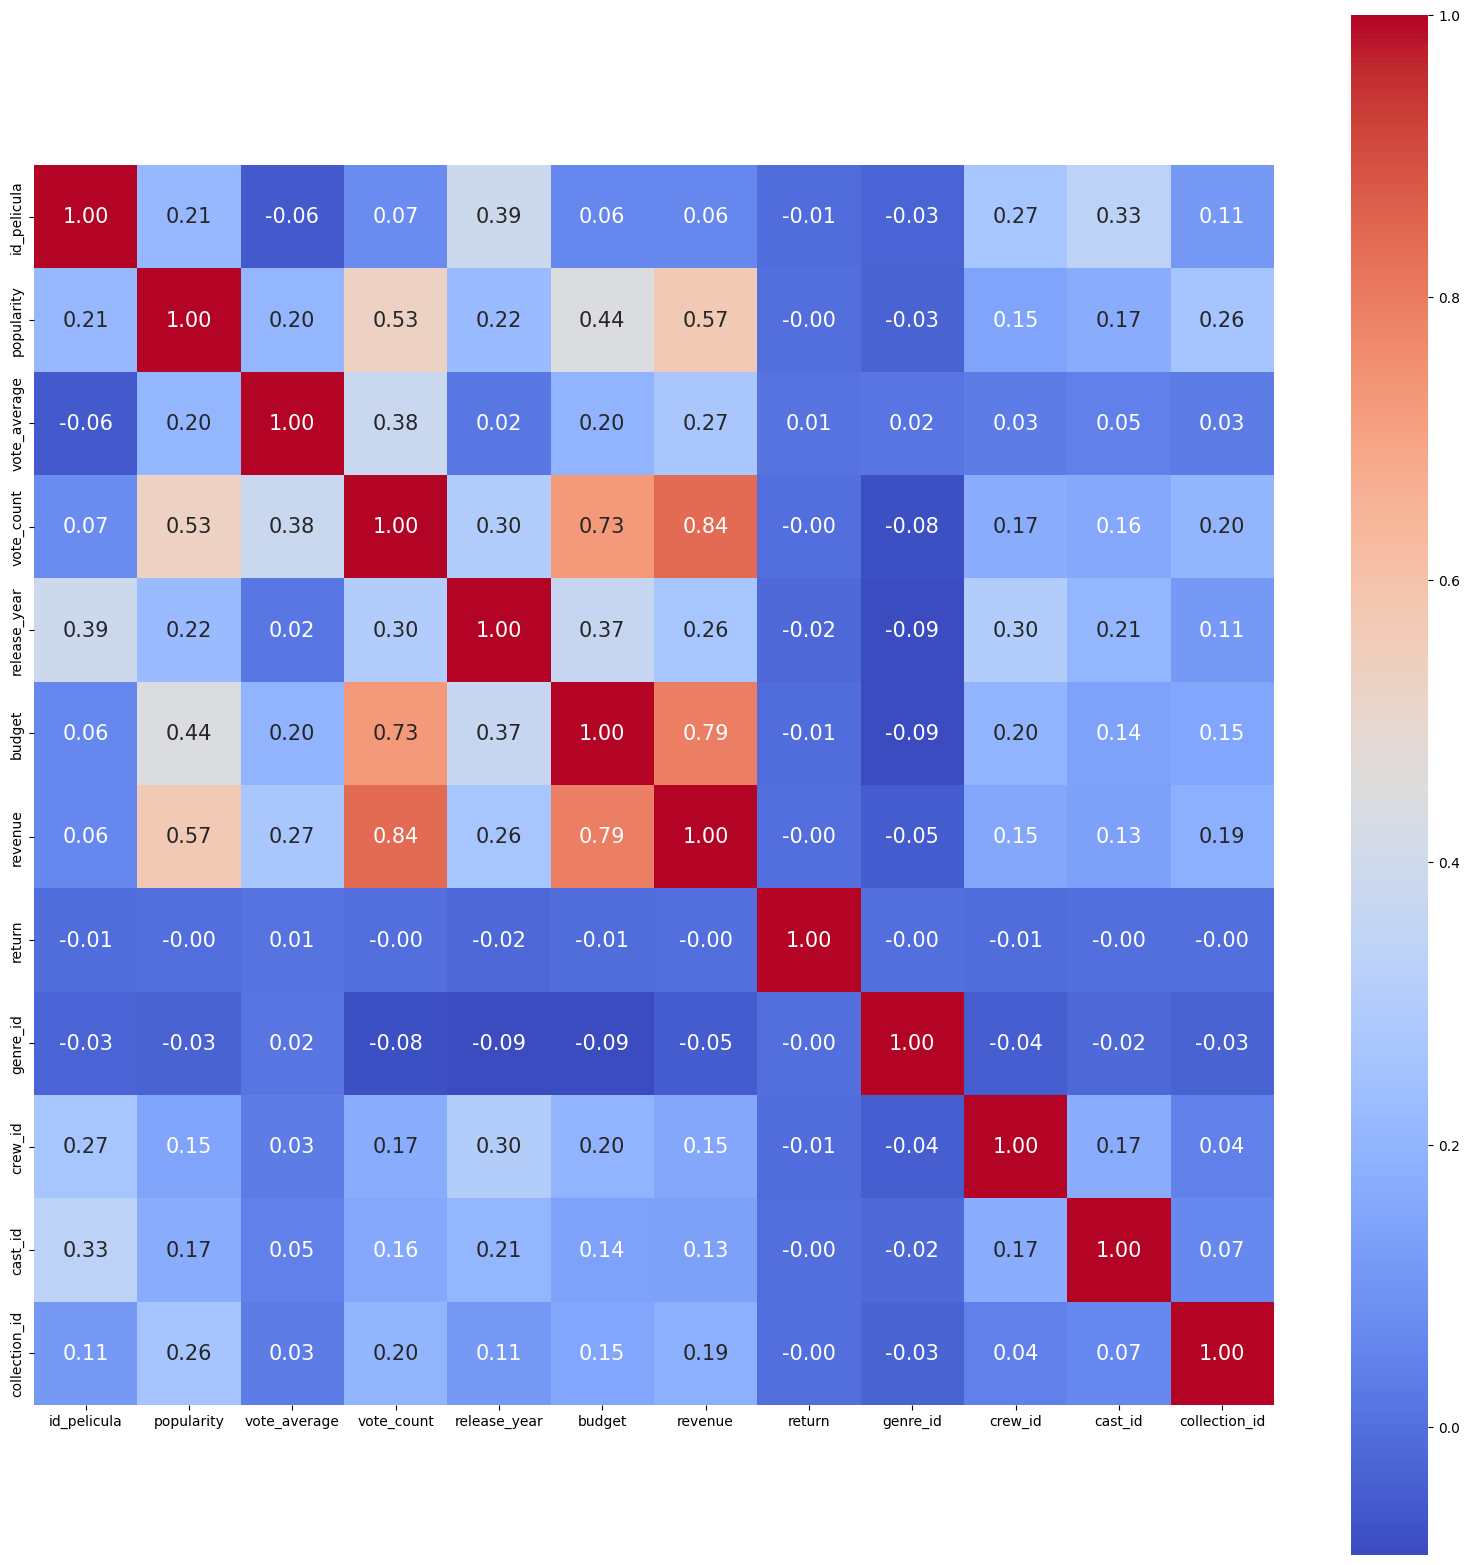

In [60]:
corr2 = df_todo.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_todo.columns, 
           yticklabels= df_todo.columns,
           cmap= 'coolwarm')

plt.show()

El return como se ve no tiene ninguna relación, se quita (lo agregamos nosotros al df asi que sabemos lo que significa, pero es una relación entre budget y revenue, para predecir es innecesario.)<br>


In [61]:
df_todo.head(3)

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,return,genre_id,crew_id,cast_id,collection_id
0,862,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,16.0,7879.0,31.0,10194.0
1,862,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,16.0,7879.0,12898.0,10194.0
2,862,21.946943,7.7,5415.0,1995,30000000.0,373554033.0,12.451801,16.0,7879.0,7167.0,10194.0


In [62]:
# Directamente cargo los archivos para no tener que correr todo el código anterior.
print(data.shape)
print(df_belongs_to_collection.shape)
print(df_crew.shape)
print(df_genres.shape)
print(df_cast.shape)

(45363, 15)
(4488, 2)
(464314, 2)
(91004, 2)
(562474, 2)


Si considero genero,popularity, vote average y vote count las mejores variables para conseguir una mejor recomendación, viendo las relaciones de las variables creo que hay que quitar las columnas:<br>
- return
- cast_gender
- crew_gender

In [63]:
df_todo.drop(columns=['return'],inplace=True)

In [64]:
# Volvi a cuando edite cada df y deje solo las columnas a usar más adelante.
# df_todo.drop(columns=['return','cast_gender','crew_gender'],inplace=True)

In [65]:
df_todo.columns

Index(['id_pelicula', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'budget', 'revenue', 'genre_id', 'crew_id', 'cast_id',
       'collection_id'],
      dtype='object')

In [66]:
df_todo.drop_duplicates(inplace=True) #Me aseguro de limpiar después de tirar tantas columnas
# Es probable que hayan filas repetidas

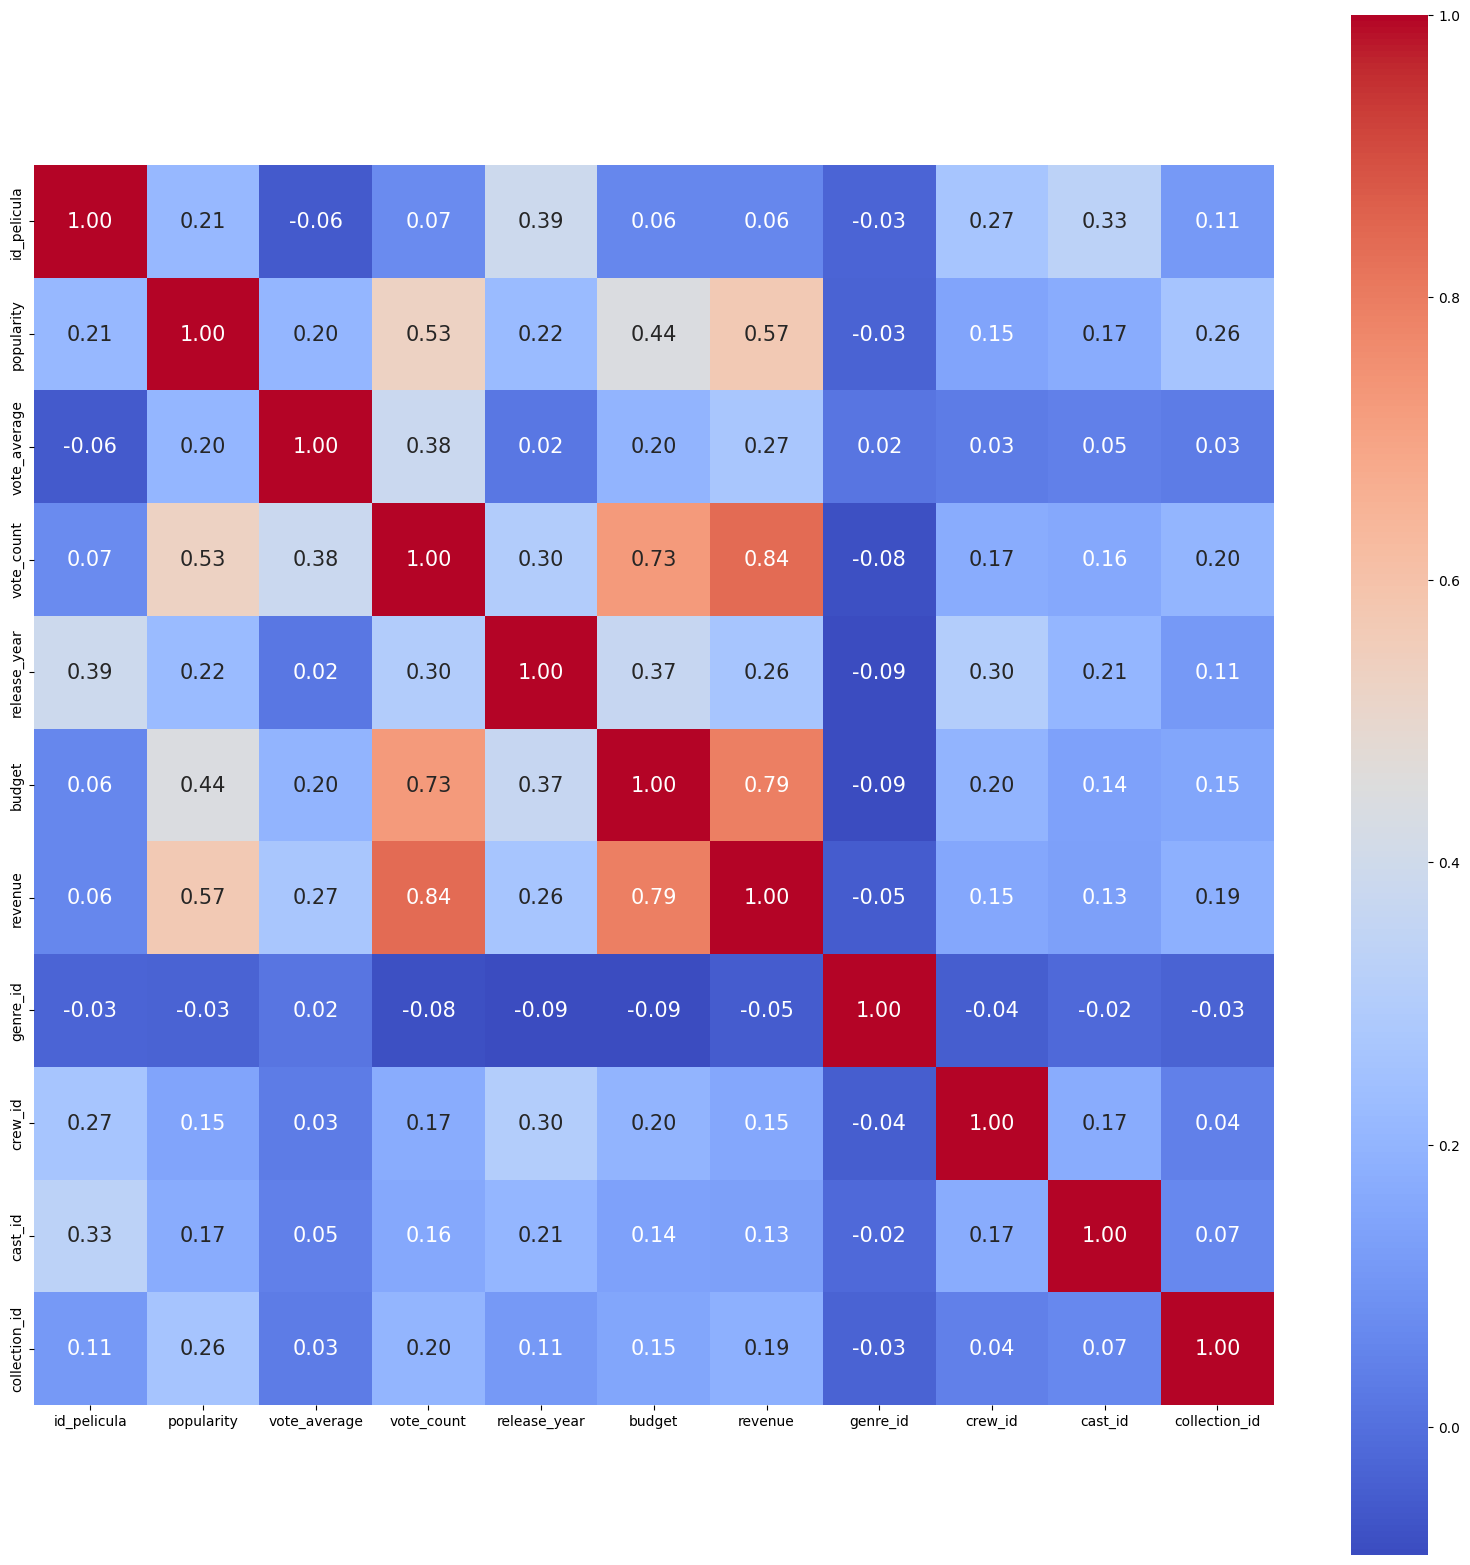

In [67]:
corr2 = df_todo.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_todo.columns, 
           yticklabels= df_todo.columns,
           cmap= 'coolwarm')

plt.show()

Me deshago de la columna "runtime" que al tener nulos no voy a poder usar el modelo de K-NN, si fuera otra columna más importante buscaria otra manera, pero al ser solamente la de duración de las peliculas puedo quitarla sin sentir tanta lastima.

In [68]:
df_todo.isna().sum()

id_pelicula          0
popularity           0
vote_average         0
vote_count           0
release_year         0
budget               0
revenue              0
genre_id         41440
crew_id           3400
cast_id           5853
collection_id        0
dtype: int64

Voy a deshacerme de filas para que no sea tan grande el df y los datos a considerar.

Voy a tomar como necesario algún valor en vote_count y vote_average.<br>
Ya que las peliculas van a setar devueltas por popularidad, esto también.<br>
Si dejo peliculas que tienen muy poca popularidad, ni siquiera van deberian ser recomendadas (ya que mi idea es que lo predicho se ordene por popularidad antes de devolver las peliculas recomendadas, estas nunca van a llegar al top 5), asi que también voy a filtrar por popularidad.

In [69]:
df_todo.sort_values(by='popularity',ascending=True).head()

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,crew_id,cast_id,collection_id
19165763,187447,0.0,0.0,0.0,1973,0.0,0.0,35.0,1467657.0,44980.0,0.0
15391563,87090,0.0,0.0,0.0,1987,0.0,0.0,18.0,1444873.0,150816.0,0.0
15391564,87090,0.0,0.0,0.0,1987,0.0,0.0,18.0,1444873.0,1444859.0,0.0
15391565,87090,0.0,0.0,0.0,1987,0.0,0.0,18.0,1444873.0,14954.0,0.0
15391566,87090,0.0,0.0,0.0,1987,0.0,0.0,18.0,1444873.0,137024.0,0.0


In [70]:
df_todo.sort_values(by='popularity',ascending=False).head()

,id_pelicula,popularity,vote_average,vote_count,release_year,budget,revenue,genre_id,crew_id,cast_id,collection_id
19619128,211672,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,35.0,59706.0,19.0,86066.0
19618993,211672,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,1024175.0,4581.0,86066.0
19618982,211672,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,124748.0,73476.0,86066.0
19618983,211672,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,124748.0,9195.0,86066.0
19618984,211672,547.488298,6.4,4729.0,2015,74000000.0,1.156731e+09,12.0,124748.0,1265060.0,86066.0


In [71]:
# Tengo 4365 peliculas
len(df_todo['id_pelicula'].unique())

45346

In [72]:
df_todo.shape

(22596944, 11)

## Filtrar Por Vote_count

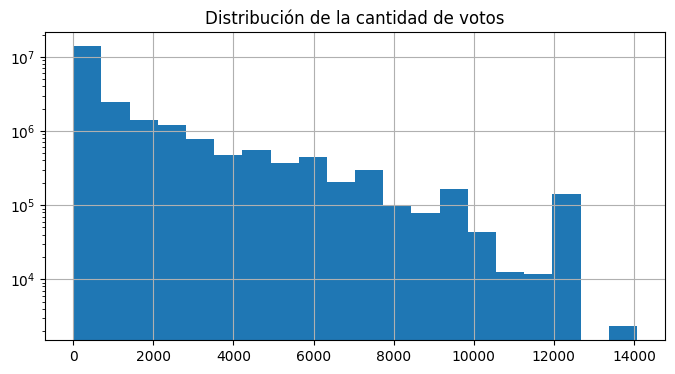

In [73]:
plt.figure(figsize = (8,4))

df_todo['vote_count'].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()

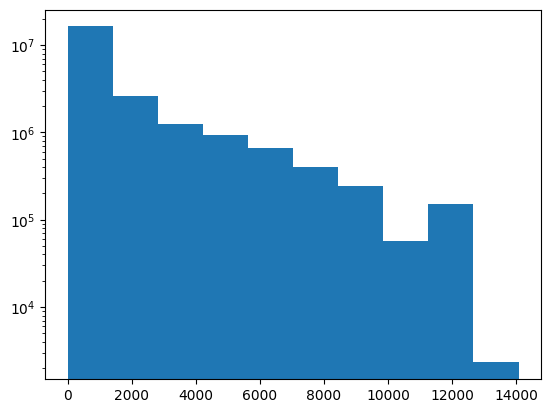

In [74]:
plt.hist(df_todo.vote_count, log= True)
plt.show()

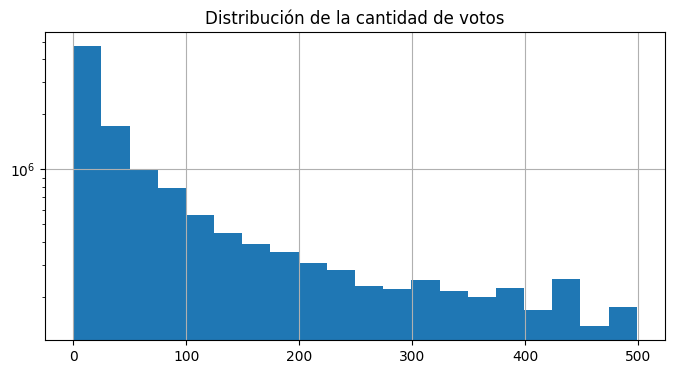

In [75]:
plt.figure(figsize = (8,4))

df_todo.vote_count[df_todo['vote_count']<500].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()

In [76]:
# Viendo el grafico me doy cuenta que hay bastante peliculas 
# Con muy poca cantidad de vote_count, y estas no nos servirian para encontrar las mejores a recomendar.

df_poco_vote=df_todo[df_todo['vote_count']<=500]

In [77]:
# Me estaria deshaciendo de 2 millones de peliculas las cuales no cuentan
# Con el suficiente feedback para confiar en su vote_average.
print(df_poco_vote.shape)

(12649019, 11)


In [78]:
len(df_poco_vote['id_pelicula'].unique())

43297

Por prueba, termino perdiendo DEMASIADAS peliculas aun poniendo como minimo 100 votos, asi que me quedo con que tiene que ser mayor a 20 votos, que ya me quita 30 mil peliculas del df

In [80]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=100].unique())

39331

In [79]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=50].unique())

36307

In [81]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=0].unique())

2846

In [82]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<=20].unique())

30065

In [83]:
len(df_poco_vote['id_pelicula'][df_poco_vote['vote_count']<20].unique())

29603

In [84]:
df_todo=df_todo[df_todo['vote_count']>=20].copy()

In [85]:
print(df_todo.shape)
df_todo['vote_count']

(18443153, 11)


0           5415.0
1           5415.0
2           5415.0
3           5415.0
4           5415.0
             ...  
24321535      26.0
24321536      26.0
24321537      26.0
24321538      26.0
24321539      26.0
Name: vote_count, Length: 18443153, dtype: float64

In [86]:
len(df_todo['id_pelicula'].unique())

15743

## Filtrar por popularidad

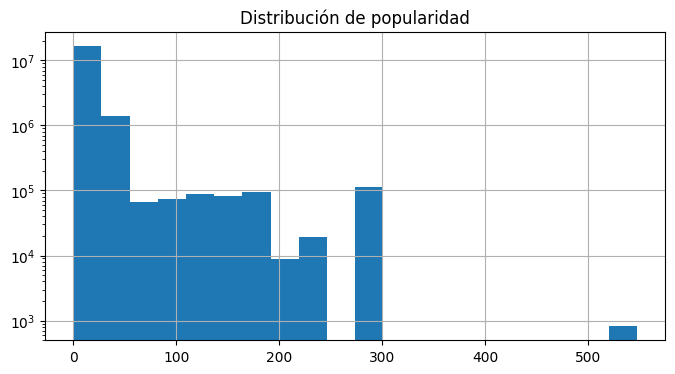

In [87]:
plt.figure(figsize = (8,4))

df_todo['popularity'].hist(log = True, bins = 20)
plt.title('Distribución de popularidad')

plt.show()

In [140]:
df_poca_popularidad=df_todo[df_todo['popularity']<=100].copy()

In [141]:
print(df_poca_popularidad.shape)
len(df_poca_popularidad['id_pelicula'].unique())

(17063789, 11)


14383

Veo que valor me quitaria algunas peliculas sin que sea una exageración.

In [142]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=100].unique())

14383

In [143]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=50].unique())

14363

In [144]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=25].unique())

14246

In [145]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=10].unique())

11566

In [146]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<=5].unique())

6435

In [147]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<5].unique())

6435

In [148]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<4].unique())

5192

In [149]:
len(df_poca_popularidad['id_pelicula'][df_poca_popularidad['popularity']<3].unique())

3720

Si quito las peliculas con una popularidad menor a 3, no estoy quitando tantas peliculas.<br>
Pero con el analisis siguiente se puede ver cómo popularity no habla bien de la pelicula, ya que hay varias dentro de esta baja popularidad que tienen muy buen valor de vote_average y cantidad

In [150]:
df_poca_popularidad['vote_average'][df_poca_popularidad['popularity']<3]

30324       5.4
30325       5.4
30326       5.4
30327       5.4
30328       5.4
           ... 
24319242    7.6
24319245    7.6
24319389    6.5
24319390    6.5
24319391    6.5
Name: vote_average, Length: 1158147, dtype: float64

In [152]:
df_poca_popularidad['vote_count'][df_poca_popularidad['popularity']<3].max()

5282.0

In [153]:
df_poca_popularidad[['vote_count','vote_average']][df_poca_popularidad['popularity']<3].max()

vote_count      5282.0
vote_average       8.8
dtype: float64

In [154]:
df_poca_popularidad[['vote_count','vote_average']][df_poca_popularidad['popularity']<3]

,vote_count,vote_average
30324,45.0,5.4
30325,45.0,5.4
30326,45.0,5.4
30327,45.0,5.4
30328,45.0,5.4
...,...,...
24319242,29.0,7.6
24319245,29.0,7.6
24319389,22.0,6.5
24319390,22.0,6.5


In [99]:
df_poca_popularidad['vote_average'][df_poca_popularidad['popularity']<3].max()

8.8

## Filtrar por vote_average

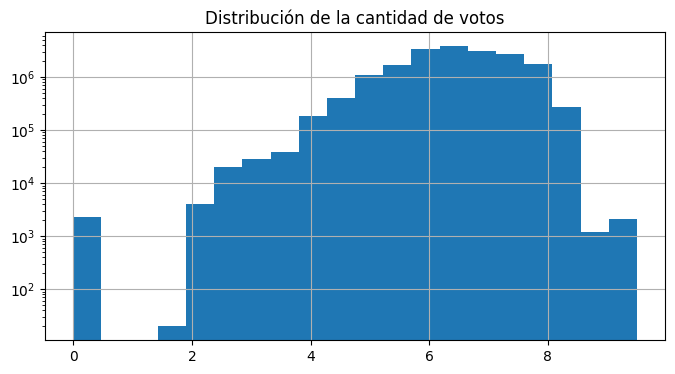

In [100]:
plt.figure(figsize = (8,4))

df_todo['vote_average'].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de votos')

plt.show()


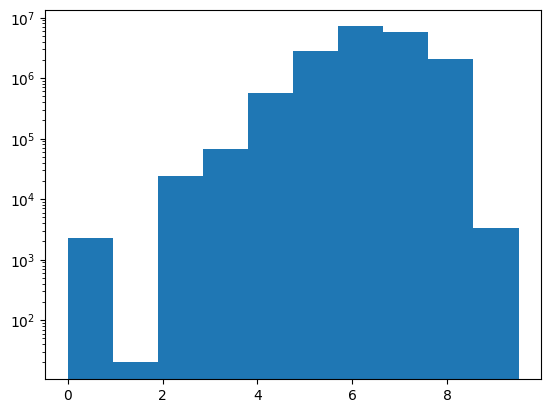

In [101]:
plt.hist(df_todo.vote_average, log= True)
plt.show()

In [102]:
df_poco_vote_average=df_todo[df_todo['vote_average']<=6].copy()

In [103]:
len(df_todo['id_pelicula'].unique())

15743

In [104]:
# No es un mal valor a quitar, pero por ahora sigamos analizando.

len(df_poco_vote_average['id_pelicula'].unique())

6085

In [105]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=5].unique())

1607

In [106]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<5].unique())

1344

In [107]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=4].unique())

295

In [108]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=3].unique())

43

In [109]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=2].unique())

5

In [110]:
len(df_poco_vote_average['id_pelicula'][df_poco_vote_average['vote_average']<=1].unique())

2

Con lo visto anteriormente, nos conviene quitar los valores de la columna "vote_average" menores a 5

In [111]:
df_poco_vote_average['popularity'][df_poco_vote_average['vote_average']<5].value_counts()

1.961208     29580
6.631356     26691
16.993841    20502
13.340272    18560
10.752519    14742
             ...  
3.662560         5
2.352048         4
1.920240         2
2.836788         2
1.177852         1
Name: popularity, Length: 1345, dtype: int64

In [112]:
df_poco_vote_average['popularity'][df_poco_vote_average['vote_average']<5].max()

34.145916

El mayor valor de popularidad que tienen estas peliculas es de 34, por lo tanto a comparación de otras no son tan importantes. Además al tener tan pocos valores de vote_average nos da pista de que no seria una buena recomendación.


In [113]:
df_todo=df_todo[df_todo['vote_average']>=5].copy()

In [114]:
# Antes hago los cambios para ver si filtrando filas se quitan todas las que contienen vacios.
#df_todo.drop(columns='runtime',inplace=True)
# Me vuelvo a asegurar que eliminar la columna no deje filas duplicadas.
df_todo.drop_duplicates(inplace=True)
df_todo.isna().sum()

id_pelicula         0
popularity          0
vote_average        0
vote_count          0
release_year        0
budget              0
revenue             0
genre_id         1233
crew_id           192
cast_id           638
collection_id       0
dtype: int64

In [115]:
len(df_todo['id_pelicula'].unique())

14399

In [116]:
df_todo['popularity'][df_todo['genre_id'].isna()].max()

7.618217

Me deshago de las filas con vacios en la columna genre_id, como se ve no tienen una popularidad importante.

In [117]:
df_todo_quito=df_todo[df_todo['genre_id'].isna()].copy()


In [118]:
len(df_todo_quito['id_pelicula'].unique())

33

In [119]:
df_todo_quito.drop_duplicates(inplace=True)
df_todo_quito.isna().sum()

id_pelicula         0
popularity          0
vote_average        0
vote_count          0
release_year        0
budget              0
revenue             0
genre_id         1233
crew_id             8
cast_id             3
collection_id       0
dtype: int64

In [120]:
lista=list(df_todo_quito['id_pelicula'].unique())

In [121]:
data['title'][data['id_pelicula'].isin(lista)]

7889                             Fahrenheit 9/11
13994                             Lost in Austen
14081                Questo piccolo grande amore
20427                                  Mothlight
20854                              The Scapegoat
24287                                   Skhizein
25308                            Ricky e Barabba
25871    Maledetto il giorno che t'ho incontrato
25873                            Viaggi di nozze
25874                                 Iris Blond
27961                                       Paz!
28509                              Cose da pazzi
30106                          7 Kilos in 7 Days
30474            Mom's Got a Date With a Vampire
31470                          Il rosso e il blu
31532                         Che ne sarà di noi
31546                              Just a Father
31819                          Giovanna's Father
32027                          Scuola di ladri 2
32029                          School of Thieves
32034               

In [122]:
#df_todo.dropna(axis=0,subset=['genre_id'])

In [123]:
df_todo.shape

(17472037, 11)

# ML

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

scl = StandardScaler()

In [125]:
X=df_todo.drop(columns='id_pelicula')

In [126]:
y=df_todo['id_pelicula']

In [127]:
X = scl.fit_transform(X)

In [128]:
y

0             862
1             862
2             862
3             862
4             862
            ...  
24321535    30840
24321536    30840
24321537    30840
24321538    30840
24321539    30840
Name: id_pelicula, Length: 17472037, dtype: int64

In [129]:
X.shape

(17472037, 10)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)

In [131]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 86272.83062974342
Proporción de etiquetas en set de testeo: 86313.65984567344


In [132]:
param_grid = {'n_neighbors':np.arange(1,100),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 35),
              'algorithm':['auto', 'kd_tree','ball_tree']}

In [133]:
knn = KNeighborsClassifier()

In [134]:
model = RandomizedSearchCV(knn, param_grid, n_iter=100, random_state=0, cv=5)

In [135]:
#model.fit(X_train, y_train)

In [136]:
'''
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores'''

'\nprint("Mejores hiperparámetros: "+str(model.best_params_))\nprint("Mejor Score: "+str(model.best_score_)+\'\n\')\n\nscores = pd.DataFrame(model.cv_results_)\nscores'